<a href="https://colab.research.google.com/github/Abhinav200207/NSFW-with-Tensorflow/blob/main/AbhinavKumarMauryaNSFW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
import time

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train_datagen.flow_from_directory('/content/drive/MyDrive/Data')

Found 1688 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/Data",
                                                 target_size = (250,250),
                                                 batch_size = 32,
                                                 class_mode = "binary")

Found 1688 images belonging to 2 classes.


In [ ]:
training_set.class_indices

{'nsfw': 0, 'sfw': 1}

In [ ]:
len(training_set)

53

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras import Model
# from tensorflow.keras import regularizers
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization,Dropout
# from tensorflow.keras.callbacks import EarlyStopping


# class ModelNSFW(Model): # nsfwmodel class extends model super class
#   def __init__(self,model = None): # Create the nsfwmodel and its layers
#     model  = Sequential()
#     model.add(Conv2D(32, kernel_size=(5, 5), padding='same',activation='relu',input_shape = (250,250,3)))
#     model.add(MaxPooling2D(pool_size=(5,5)))
#     model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(5, 5)))
#     model.add(Conv2D(128, kernel_size=(5, 5), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(5, 5)))
#     model.add(Flatten())
#     model.add(Dense(512, kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5), activation = 'relu'))
#     model.add(Dropout(0.4))
#     model.add(Dense(128, activation='relu'))
#     model.add(Dense(32, activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))
#     # print(model.summary())
	
#   def fit(self,X,epoch):
#       with tf.device("/device:TPU:0"):
#           self.model.compile(optimizer = 'adam' , metrics= ['accuracy'], loss = 'binary_crossentropy')
#           early = EarlyStopping(patience = 3)
#           self.model.fit(X,epochs = epoch, callbacks = [early])
  
#   def predict(self,x_test):
#   	self.model.predict(x_test)
  
#   def saveModel(self,name):
#     self.model.save(name)


In [ ]:
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization,Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
early = EarlyStopping(patience = 3)
with tf.device("/device:GPU:0"):
    model.add(Conv2D(32, kernel_size=(5, 5), padding='same',activation='relu',input_shape = (250,250,3)))
    model.add(MaxPooling2D(pool_size=(5,5)))
    model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(5, 5)))
    model.add(Conv2D(128, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(5, 5)))
    model.add(Flatten())
    model.add(Dense(512, kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5), activation = 'relu'))
    model.add(Dropout(0.45))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer = 'adam' , metrics= ['accuracy'], loss = 'binary_crossentropy')

    model.fit(training_set,epochs = 25, callbacks = [early])

Epoch 1/25
53/53 [==============================] - 685s 13s/step - loss: 0.5238 - accuracy: 0.7524
Epoch 2/25
53/53 [==============================] - 210s 4s/step - loss: 0.3548 - accuracy: 0.8697
Epoch 3/25
53/53 [==============================] - 207s 4s/step - loss: 0.3377 - accuracy: 0.8661
Epoch 4/25
53/53 [==============================] - 208s 4s/step - loss: 0.3083 - accuracy: 0.8857
Epoch 5/25
53/53 [==============================] - 207s 4s/step - loss: 0.3164 - accuracy: 0.8910
Epoch 6/25
53/53 [==============================] - 207s 4s/step - loss: 0.2939 - accuracy: 0.8910
Epoch 7/25
53/53 [==============================] - 214s 4s/step - loss: 0.2442 - accuracy: 0.9117
Epoch 8/25
53/53 [==============================] - 212s 4s/step - loss: 0.2211 - accuracy: 0.9194
Epoch 9/25
53/53 [==============================] - 210s 4s/step - loss: 0.2384 - accuracy: 0.9088
Epoch 10/25
53/53 [==============================] - 208s 4s/step - loss: 0.2103 - accuracy: 0.9230
Epoch 11

In [ ]:
model.fit(training_set,epochs = 10, callbacks = [early])

Epoch 1/10
53/53 [==============================] - 209s 4s/step - loss: 0.1003 - accuracy: 0.9674
Epoch 2/10
53/53 [==============================] - 212s 4s/step - loss: 0.0827 - accuracy: 0.9769
Epoch 3/10
53/53 [==============================] - 209s 4s/step - loss: 0.0815 - accuracy: 0.9781
Epoch 4/10
53/53 [==============================] - 207s 4s/step - loss: 0.1043 - accuracy: 0.9662
Epoch 5/10
53/53 [==============================] - 208s 4s/step - loss: 0.0871 - accuracy: 0.9745
Epoch 6/10
53/53 [==============================] - 209s 4s/step - loss: 0.0823 - accuracy: 0.9751
Epoch 7/10
53/53 [==============================] - 208s 4s/step - loss: 0.0742 - accuracy: 0.9751
Epoch 8/10
53/53 [==============================] - 208s 4s/step - loss: 0.0927 - accuracy: 0.9680
Epoch 9/10
53/53 [==============================] - 214s 4s/step - loss: 0.0616 - accuracy: 0.9793
Epoch 10/10
53/53 [==============================] - 215s 4s/step - loss: 0.1199 - accuracy: 0.9597


In [ ]:
model.fit(training_set,epochs = 5, callbacks = [early])

Epoch 1/5
53/53 [==============================] - 213s 4s/step - loss: 0.0637 - accuracy: 0.9775
Epoch 2/5
53/53 [==============================] - 214s 4s/step - loss: 0.0967 - accuracy: 0.9716
Epoch 3/5
53/53 [==============================] - 211s 4s/step - loss: 0.0592 - accuracy: 0.9852
Epoch 4/5
53/53 [==============================] - 210s 4s/step - loss: 0.0478 - accuracy: 0.9864
Epoch 5/5
53/53 [==============================] - 211s 4s/step - loss: 0.0499 - accuracy: 0.9834


In [ ]:
model.save("/content/drive/MyDrive/NSFW_Abhinav_Final.h5")

In [ ]:
from tensorflow.keras.preprocessing.image import smart_resize
def predict_nsfw(image_path,model):
    img = plt.imread(image_path)
    a = smart_resize(img,size=(250,250),interpolation = 'nearest')
    plt.imshow(a)
    a = a.reshape(-1,250,250,3)
    if(np.round(model.predict(a))):
        return 'SFW'
    else:
        return 'NSFW'

SFW


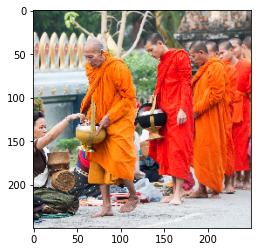

In [ ]:
print(predict_nsfw('/content/drive/MyDrive/Data/sfw/daniel-marchal-398161-unsplash.jpg',model))